# Introduction

*Daniel Jacobson*

This notebook performs an analysis of the operating data for all locations of a portfolio company.

This analysis explores the following research question: <br>
*"What factors have led to historical outperformance across locations?"* <br>

# Part 1 - Summary Statistics and Plots

### Import Statements

In [1]:
import numpy as np
import statistics as stat
import matplotlib.pyplot as plt
import statsmodels.stats.api as sm
import pandas as pd

### Data Preview

In [2]:
file = open("undergrad_takehome_2020.csv")
data = pd.read_csv(file)
data.head(5)

,Location number,Month,State,Gross revenue,Fixed cost,Variable cost,Rental cost,Number of products,Owned
0,1,1,TX,48628171.02,9218156.69,24278189.23,365880,4452,False
1,1,2,TX,48107179.24,10587747.35,25116844.41,365880,4452,False
2,1,3,TX,64352278.29,10193873.77,33703499.83,365880,4452,False
3,1,4,TX,45943677.96,8764165.00,24037719.47,365880,4452,False
4,1,5,TX,32761434.98,8022116.43,16432119.18,365880,4452,False


### Calculation of the annual profit margin for each location

In [3]:
n = len(data["Location number"]) # number of data entrys
annual_profit_margins = [] # array of each location's annual profit margin
gross_revenue = 0
fixed_cost = 0
variable_cost = 0
apm = 0 # annual profit margin

# for loop that iterates over every data entry
for i in range(0,n):
    gross_revenue += data["Gross revenue"][i] # summation of annual gross revenue
    fixed_cost += data["Fixed cost"][i]       # summation of annual fixed cost
    variable_cost += data["Variable cost"][i] # summation of annual variable cost
    
    # if statement checks for the end of the year for a location's data
    if data["Month"][i] == 12:
        
        # annual profit margin = (revenue - costs) / revenue x 100
        apm = (gross_revenue - (fixed_cost + variable_cost)) / gross_revenue * 100
        annual_profit_margins.append(apm)
        gross_revenue = 0  # rests the annual gross revenue for the next location
        fixed_cost = 0     # rests the annual fixed cost for the next location
        variable_cost = 0  # rests the annual variable cost for the next location
        apm = 0            # rests the annual profit margin for the next location

### Calculation of the annual profit margin mean and median

In [4]:
mean = np.mean(annual_profit_margins)
median = stat.median(annual_profit_margins)
print("The mean annual profit margin of a typical store is: " + str(round(mean,2)))
print("The median annual profit margin of a typical store is: " + str(round(median,2)))

The mean annual profit margin of a typical store is: 25.4
The median annual profit margin of a typical store is: 26.71


### Visualization of the distribution of the annual profit margins

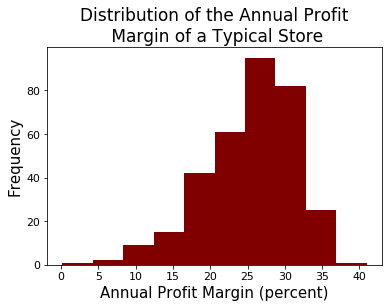

In [5]:
fig1, ax1 = plt.subplots()
ax1.hist(annual_profit_margins,color='maroon')
ax1.set_title("Distribution of the Annual Profit\n Margin of a Typical Store", fontsize=17)
ax1.set_xlabel("Annual Profit Margin (percent)", fontsize=15)
ax1.set_ylabel("Frequency", fontsize=15)
ax1.tick_params(labelsize=11)
plt.show()

The distribution of the annual profit margin of a typical store is negatively skewed.
The median is greater than the mean.

### Calculation of the monthly and quarterly aggregate revenues across all stores

In [6]:
monthly_aggregate_revenue = [0]*12 # an empty array of length 12 (monthly)
quarterly_aggregate_revenue = [0]*4 # an empty array of length 4 (quarterly)
q = 1 # financial quarter (1-4)

# for loop that iterates over every data entry
for i in range(0,n):
    month = data["Month"][i]
    
    # summation of monthly aggregate revenue
    monthly_aggregate_revenue[month - 1] += float(data["Gross revenue"][i])
    
    # summation of quarterly aggregate revenue
    quarterly_aggregate_revenue[q - 1] += float(data["Gross revenue"][i])
    
    # if statement that checks for the end of a quarter
    if month % 3 == 0:
        q += 1
        
    # if statement that checks for the end of the year
    if q == 5:
        q = 1

### Visualization of the monthly aggregate revenues across all stores

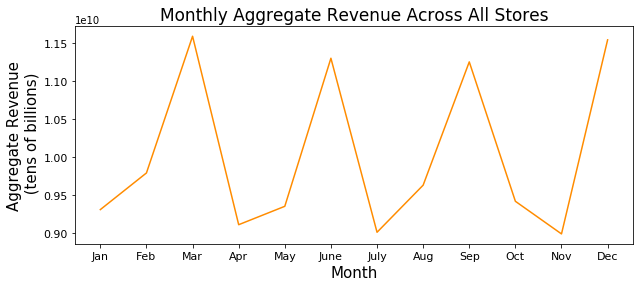

In [7]:
month_labels = ["Jan", "Feb", "Mar", "Apr", "May", "June", "July", "Aug", "Sep", "Oct",
        "Nov", "Dec"]
fig2, ax2 = plt.subplots(figsize=(10,4))
ax2.plot(month_labels, monthly_aggregate_revenue, color="darkorange")
ax2.set_title("Monthly Aggregate Revenue Across All Stores", fontsize=17)
ax2.set_xlabel("Month", fontsize=15)
ax2.set_ylabel("Aggregate Revenue\n (tens of billions)", fontsize=15)
ax2.tick_params(labelsize=11)
plt.show()

The monthly aggregate revenue peaks during the last month of every quarter. 

### Visualization of the quarterly aggregate revenues across all stores

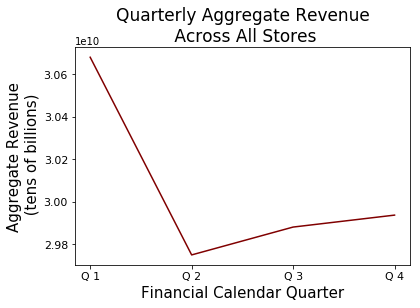

In [8]:
quarter_labels = ["Q 1", "Q 2", "Q 3", "Q 4"]
fig3, ax3 = plt.subplots()
ax3.plot(quarter_labels, quarterly_aggregate_revenue, color="maroon")
ax3.set_title("Quarterly Aggregate Revenue\n Across All Stores", fontsize=17)
ax3.set_xlabel("Financial Calendar Quarter", fontsize=15)
ax3.set_ylabel("Aggregate Revenue\n (tens of billions)", fontsize=15)
ax3.tick_params(labelsize=11)
plt.show()

In [9]:
# calculation of percent decrease from quarter 1 to quarter 2
percent_decrease = (quarterly_aggregate_revenue[1] - quarterly_aggregate_revenue[0]) / quarterly_aggregate_revenue[0] * 100
print("The aggregate revenue of all stores had a sharp decline in revenue this past year.")
print("The company saw a " + str(round(percent_decrease,2)) + " percent decrease in revenue after the first quarter.")

The aggregate revenue of all stores had a sharp decline in revenue this past year.
The company saw a -3.03 percent decrease in revenue after the first quarter.


# Part 2 - Cleaning the Data

### Calculation of the rent-adjusted annual profit margin

In [10]:
gross_revenue = 0
fixed_cost = 0
variable_cost = 0
rental_cost = 0
apm = 0         # annual profit margin
rent_apms = []  # annual profit margin of rented locations 
owned_apms = [] # annual profit margin of owned locations

# for loop that iterates over every data entry
for i in range(0,n):
    gross_revenue += float(data["Gross revenue"][i]) # summation of annual gross revenue
    fixed_cost += float(data["Fixed cost"][i])       # summation of annual fixed cost
    variable_cost += float(data["Variable cost"][i]) # summation of annual variable cost
    
    # if statement that checks for the end of the year
    if data["Month"][i] == 12:
        
        # if statement that checks if a location is owned
        if data["Owned"][i]:
            
            # annual profit margin = (revenue - costs) / revenue x 100
            apm = (gross_revenue - (fixed_cost + variable_cost)) / gross_revenue * 100
            owned_apms.append(apm)
        else:
            rental_cost = float(data["Rental cost"][i])*12 # annual rental cost
            
            # annual profit margin = (revenue - costs) / revenue x 100
            apm = (gross_revenue - (fixed_cost + variable_cost + rental_cost)) / gross_revenue * 100
            rent_apms.append(apm)        
        
        gross_revenue = 0  # rests the annual gross revenue for the next location
        fixed_cost = 0     # rests the annual fixed cost for the next location
        variable_cost = 0  # rests the annual variable cost for the next location
        rental_cost = 0    # rests the annual rental cost for the next location
        apm = 0            # rests the annual profit margin for the next location

# Part 3 - Quantify Drivers of Success

### Visualization of the annual profit margin of owned vs. rented locations

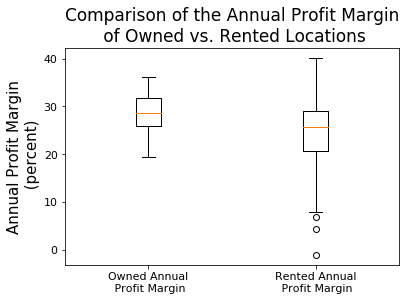

In [11]:
fig4, ax4 = plt.subplots()
ax4.boxplot([owned_apms,rent_apms])
ax4.set_title("Comparison of the Annual Profit Margin\n of Owned vs. Rented Locations", fontsize=17)
ax4.set_xticklabels(["Owned Annual\n Profit Margin","Rented Annual\n Profit Margin"])
ax4.set_ylabel("Annual Profit Margin\n (percent)", fontsize=15)
ax4.tick_params(labelsize=11)
plt.show()

There is a noticeable difference in variability of the annual profit margins. The owned annual profit margin has a minimum around 20 percent and a maximum just below 40 percent. The rented annual profit margin has an outlier near 0 percent, a minimum just under 10 percent, and a maximum just over 40 percent. High variability is a sign of inefficiency. By inspection, it appears that the owned annual profit margin mean is higher than the mean of the rented.

### Unpaired t-test of the annual profit margin mean of owned vs. rented locations

The unpaired t-test will test the following Hypothesis:
$$H_{0}: \mu_{1} - \mu_{2} = 0$$
$$H_{\alpha}: \mu_{1} - \mu_{2} \neq 0$$

In [12]:
comparison = sm.CompareMeans(sm.DescrStatsW(owned_apms), sm.DescrStatsW(rent_apms))
print(comparison.summary(use_t=True, alpha=0.01, usevar='unequal', value=0))

                          Test for equality of means                          
                 coef    std err          t      P>|t|      [0.005      0.995]
------------------------------------------------------------------------------
subset #1      4.2102      0.740      5.688      0.000       2.242       6.178


The results of the unpaired t-test confirm that the annual profit margin mean of the owned locations is significantly higher than the rented locations. There is 99% certainty that the owned annual profit margin mean is 2.242 to 6.178 percent higher than the rented mean.

### Conclusion

The main cause for historical underperformance in this system stems from the monthly costs of renting a location. The locations that are rented have a noticeably larger variance of annual profit margin compared to the owned locations. High variance is a sign of inefficacy. Reducing the variance in a system improves quality and efficiency. Also, owned locations have a statistically significant difference in annual profit margin mean than rented locations. On average, the owned locations generate between 2 and 6 percent more annual profit margin. Owning a location is substantially cost beneficial and more efficient.